In [1]:
%pip install xgboost
%pip install package
%pip install tensorflow


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings

# Optional: Configure settings at the start of your script
warnings.filterwarnings('ignore')  # to ignore any warnings that might clutter the output
sns.set(style="whitegrid")  # for seaborn plots with a white grid background

# Further code for data manipulation, analysis, model training, etc., goes here

##**Dataset Loading**

In [4]:
file_path = 'Air_Quality.csv'
air_quality_df = pd.read_csv(file_path)

In [5]:
air_quality_df.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID         int64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
dtype: object

## **Data Preprocessing**

In [6]:
air_quality_df['Start_Date'] = pd.to_datetime(air_quality_df['Start_Date'])

summary_stats = air_quality_df.describe()

air_quality_df['Year'] = air_quality_df['Start_Date'].dt.year

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(air_quality_df, test_size=0.2, random_state=42)

In [7]:
air_quality_df['Start_Date'] = pd.to_datetime(air_quality_df['Start_Date'])

##**Basic Exploratory Data Analysis**

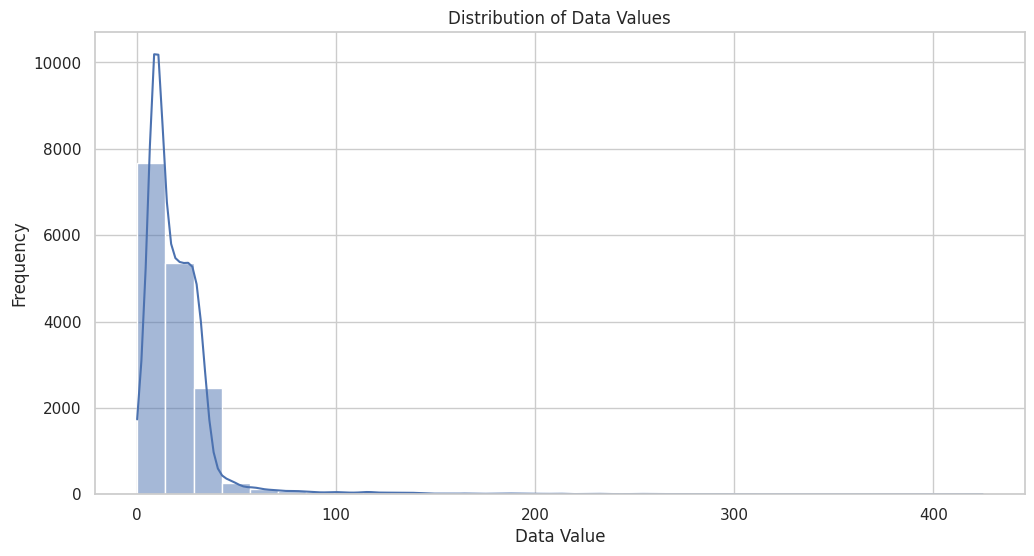

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(air_quality_df['Data Value'], kde=True, bins=30)
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

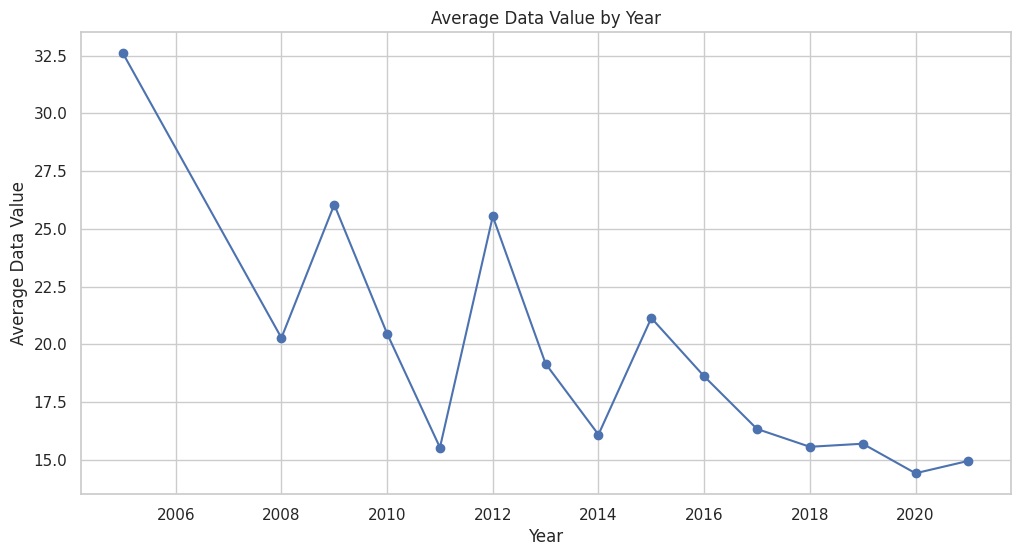

In [9]:
air_quality_df['Year'] = air_quality_df['Start_Date'].dt.year

plt.figure(figsize=(12, 6))
yearly_trend = air_quality_df.groupby('Year')['Data Value'].mean()
yearly_trend.plot(kind='line', marker='o')
plt.title('Average Data Value by Year')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.grid(True)
plt.show()

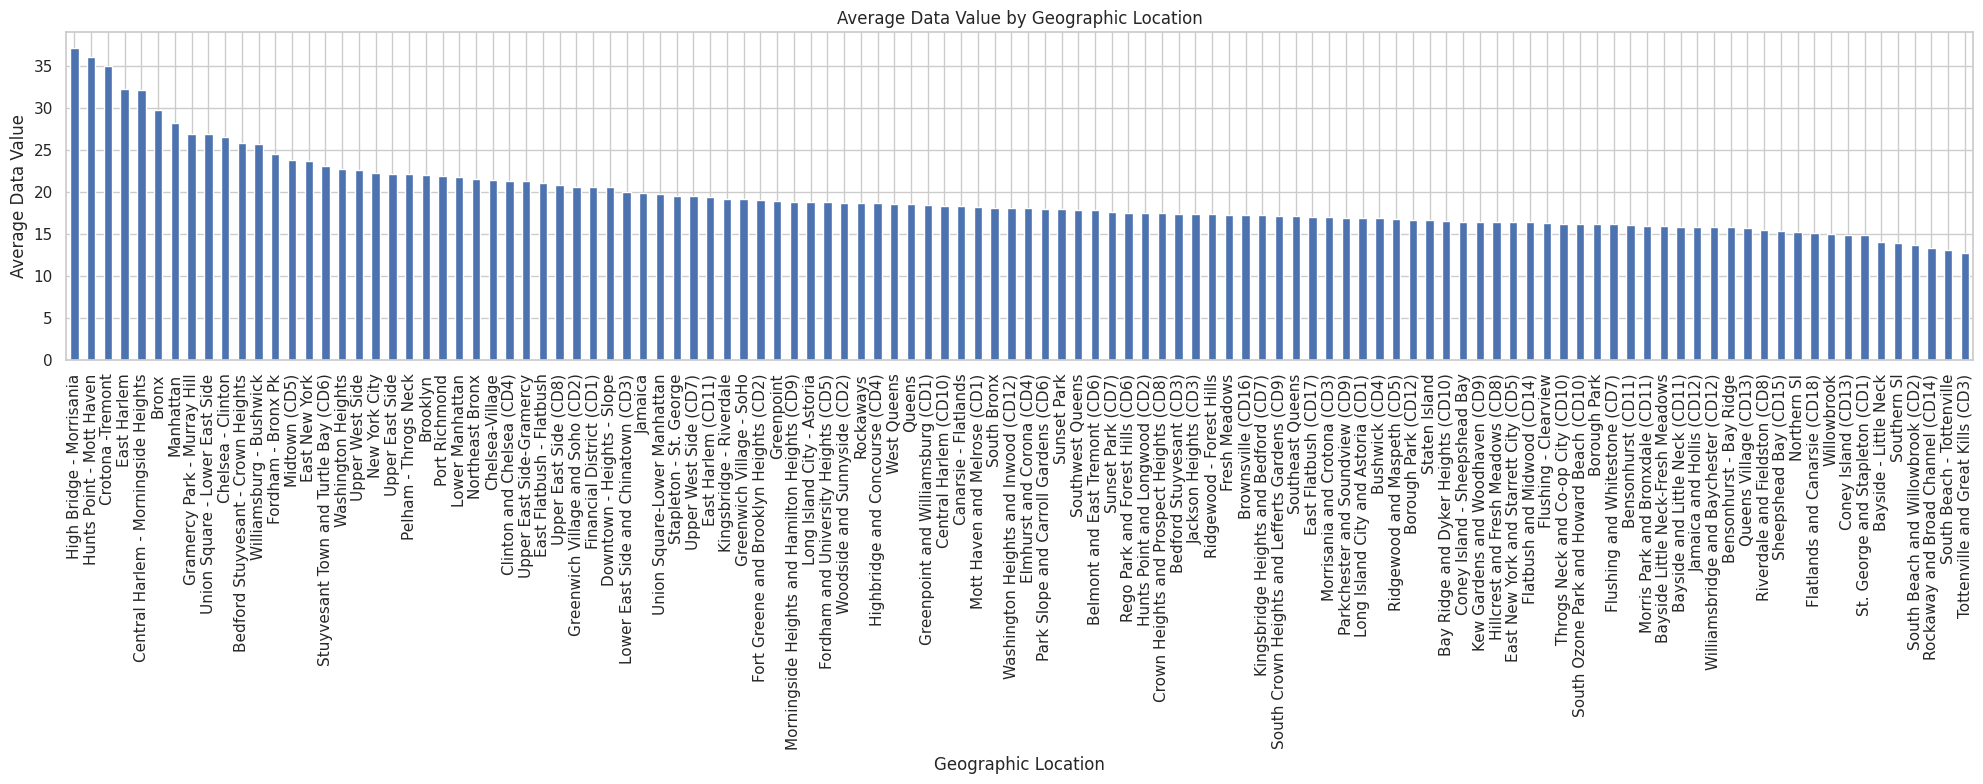

In [10]:
plt.figure(figsize=(20, 8))
geo_trend = air_quality_df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False)
geo_trend.plot(kind='bar')
plt.title('Average Data Value by Geographic Location')
plt.xlabel('Geographic Location')
plt.ylabel('Average Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


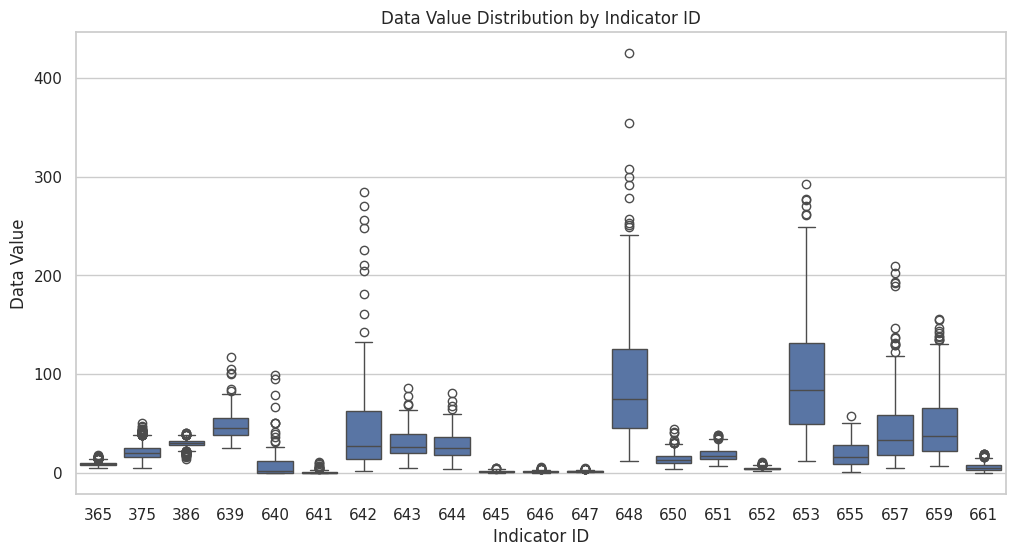

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Indicator ID', y='Data Value', data=air_quality_df)
plt.title('Data Value Distribution by Indicator ID')
plt.xlabel('Indicator ID')
plt.ylabel('Data Value')
plt.show()


In [12]:
# Temporal Features
air_quality_df['Year'] = air_quality_df['Start_Date'].dt.year
air_quality_df['Month'] = air_quality_df['Start_Date'].dt.month
air_quality_df['DayOfWeek'] = air_quality_df['Start_Date'].dt.dayofweek

# Lag Features for time series forecasting
air_quality_df['Lag_1'] = air_quality_df['Data Value'].shift(1)

# Rolling Window Statistics for trend analysis
air_quality_df['Rolling_Mean_3'] = air_quality_df['Data Value'].rolling(window=3).mean()

air_quality_df.head()


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Year,Month,DayOfWeek,Lag_1,Rolling_Mean_3
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,2010-12-01,25.30,2010,12,2,NaN,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,2008-12-01,26.93,2008,12,0,25.30,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,2015-01-01,19.09,2015,1,3,26.93,23.773333
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,2015-01-01,19.76,2015,1,3,19.09,21.926667
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,2008-12-01,22.83,2008,12,0,19.76,20.560000


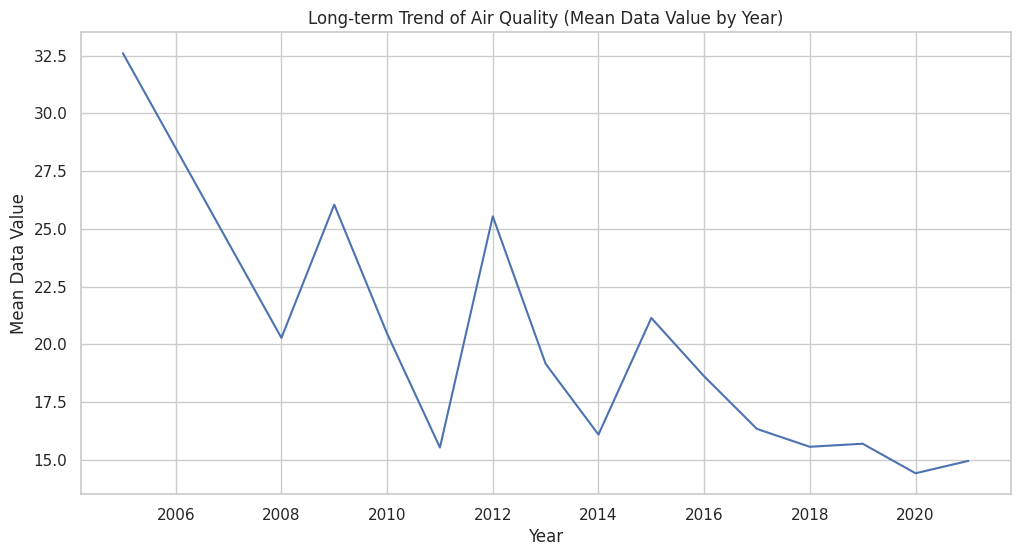

In [13]:
sns.set_style("whitegrid")

# Long-term Trend Analysis: Plotting the mean 'Data Value' by 'Year'
plt.figure(figsize=(12, 6))
sns.lineplot(data=air_quality_df, x='Year', y='Data Value', estimator='mean', ci=None)
plt.title('Long-term Trend of Air Quality (Mean Data Value by Year)')
plt.ylabel('Mean Data Value')
plt.xlabel('Year')
plt.show()

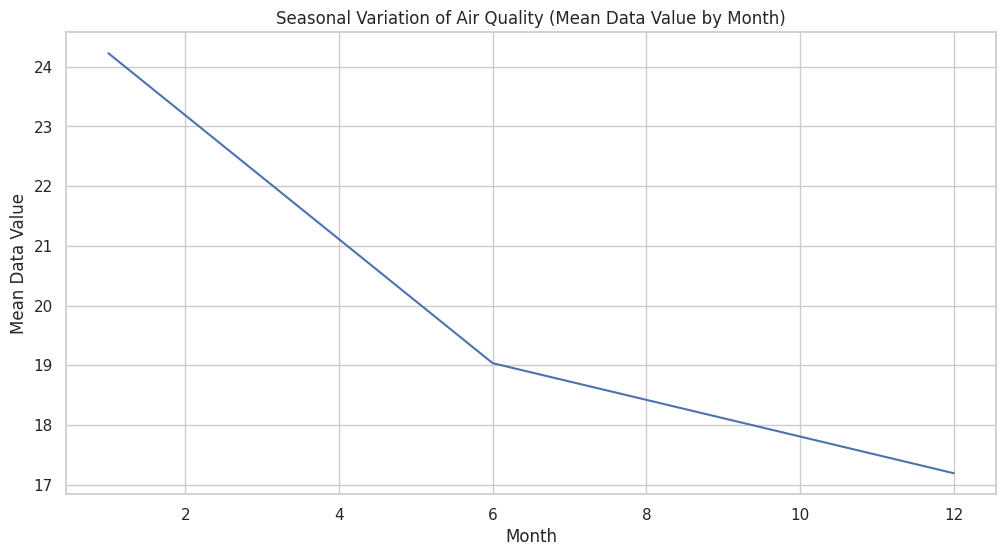

In [14]:
# Seasonal Variation Analysis: Plotting the mean 'Data Value' by 'Month'
plt.figure(figsize=(12, 6))
sns.lineplot(data=air_quality_df, x='Month', y='Data Value', estimator='mean', ci=None)
plt.title('Seasonal Variation of Air Quality (Mean Data Value by Month)')
plt.ylabel('Mean Data Value')
plt.xlabel('Month')
plt.show()

In [15]:
# Load the dataset
file_path = 'Filtered_Nitrogen_Dioxide_Data.csv'
data = pd.read_csv(file_path)

ADF Statistic: -1.1683866338121984
p-value: 0.6870450510175785


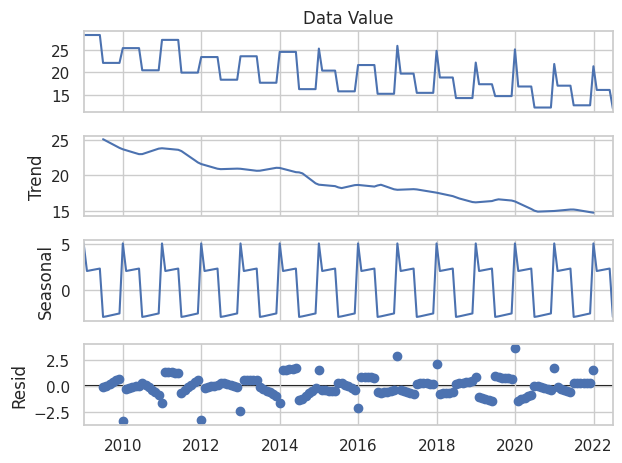

In [16]:

# Load the dataset
file_path = 'Filtered_Nitrogen_Dioxide_Data.csv'
data = pd.read_csv(file_path)
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

# Group by Start_Date to create a time series (aggregating by mean if multiple measurements per day)
time_series = data.groupby('Start_Date')['Data Value'].mean()

# Resample the series to monthly frequency, filling missing data
monthly_series = time_series.resample('M').mean().fillna(method='ffill')  # Forward fill to handle missing values

# Confirming that the frequency is set
monthly_series.index.freq = 'M'

# Check for stationarity
result = adfuller(monthly_series.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Decompose the series to observe trend and seasonality
decomposition = seasonal_decompose(monthly_series, model='additive')
fig = decomposition.plot()
plt.show()


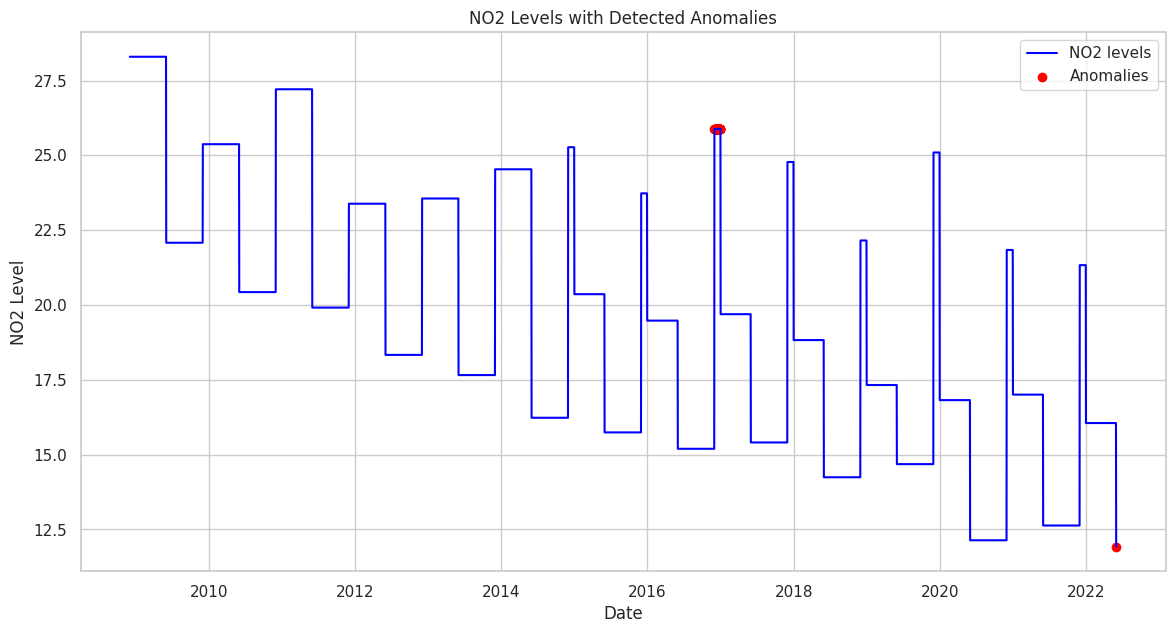

In [17]:


# Load and prepare the dataset
file_path = 'Filtered_Nitrogen_Dioxide_Data.csv'
data = pd.read_csv(file_path)
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

# Group by Start_Date and aggregate NO2 levels (assuming daily data, adjust if different)
time_series = data.groupby('Start_Date')['Data Value'].mean()

# Resampling to ensure consistent data points (daily in this case)
daily_series = time_series.resample('D').mean().fillna(method='ffill')

# Fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42) # contamination is an estimate of the anomaly percentage
daily_series = daily_series.to_frame()
daily_series['anomaly'] = iso_forest.fit_predict(daily_series)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(daily_series.index, daily_series['Data Value'], color='blue', label='NO2 levels')
anomalies = daily_series[daily_series['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['Data Value'], color='red', label='Anomalies')
plt.legend()
plt.title('NO2 Levels with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.show()


In [18]:


# Load the dataset
file_path = 'Filtered_Nitrogen_Dioxide_Data.csv'
data = pd.read_csv(file_path)
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

# Define thresholds for categories based on the environmental standards or data distribution
thresholds = [10, 20, 30]  # Adjust these based on the data
data['Category'] = pd.cut(data['Data Value'], bins=[-np.inf] + thresholds + [np.inf], labels=['Low', 'Moderate', 'High', 'Very High'])

# Advanced Feature Engineering
data['Year'] = data['Start_Date'].dt.year
data['Month'] = data['Start_Date'].dt.month
data['Day'] = data['Start_Date'].dt.day
data['DayOfWeek'] = data['Start_Date'].dt.dayofweek

# Preparing features and target variable
X = data[['Year', 'Month', 'Day', 'DayOfWeek']]  # Extend with more features
y = data['Category']

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the pipeline with SMOTE and RandomForestClassifier
pipeline = make_pipeline_imb(
    StandardScaler(),
    SMOTE(random_state=42),
    RandomForestClassifier(random_state=42)
)

# Parameters for GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Best Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best Model Accuracy: 0.4708860759493671
Confusion Matrix:
 [[238  23  96 165]
 [  0  24   5   0]
 [ 48 219 242  35]
 [ 28   0   8  54]]
Classification Report:
               precision    recall  f1-score   support

        High       0.76      0.46      0.57       522
         Low       0.09      0.83      0.16        29
    Moderate       0.69      0.44      0.54       544
   Very High       0.21      0.60      0.31        90

    accuracy                           0.47      1185
   macro avg       0.44      0.58      0.40      1185
weighted avg       0.67      0.47      0.53      1185



In [19]:


# Load dataset
file_path = 'Filtered_Nitrogen_Dioxide_Data.csv'
data = pd.read_csv(file_path)
data['Start_Date'] = pd.to_datetime(data['Start_Date'])
data = data.set_index('Start_Date')['Data Value'].resample('D').mean().fillna(method='ffill')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Function to create sequences
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
look_back = 30  # Use the last 30 days to predict the next day
X, Y = create_dataset(data_scaled, look_back)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transformation for actual prediction values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform([y_train])
y_test_inv = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(np.mean((train_predict - y_train_inv)**2))
test_rmse = np.sqrt(np.mean((test_predict - y_test_inv)**2))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)



Epoch 1/50
3920/3920 - 17s - loss: 0.0032 - 17s/epoch - 4ms/step
Epoch 2/50
3920/3920 - 13s - loss: 0.0016 - 13s/epoch - 3ms/step
Epoch 3/50
3920/3920 - 13s - loss: 0.0015 - 13s/epoch - 3ms/step
Epoch 4/50
3920/3920 - 14s - loss: 0.0014 - 14s/epoch - 4ms/step
Epoch 5/50
3920/3920 - 13s - loss: 0.0014 - 13s/epoch - 3ms/step
Epoch 6/50
3920/3920 - 13s - loss: 0.0014 - 13s/epoch - 3ms/step
Epoch 7/50
3920/3920 - 13s - loss: 0.0014 - 13s/epoch - 3ms/step
Epoch 8/50
3920/3920 - 14s - loss: 0.0014 - 14s/epoch - 3ms/step
Epoch 9/50
3920/3920 - 13s - loss: 0.0014 - 13s/epoch - 3ms/step
Epoch 10/50
3920/3920 - 13s - loss: 0.0014 - 13s/epoch - 3ms/step
Epoch 11/50
3920/3920 - 13s - loss: 0.0013 - 13s/epoch - 3ms/step
Epoch 12/50
3920/3920 - 13s - loss: 0.0013 - 13s/epoch - 3ms/step
Epoch 13/50
3920/3920 - 14s - loss: 0.0013 - 14s/epoch - 3ms/step
Epoch 14/50
3920/3920 - 14s - loss: 0.0013 - 14s/epoch - 4ms/step
Epoch 15/50
3920/3920 - 13s - loss: 0.0013 - 13s/epoch - 3ms/step
Epoch 16/50
3920/39

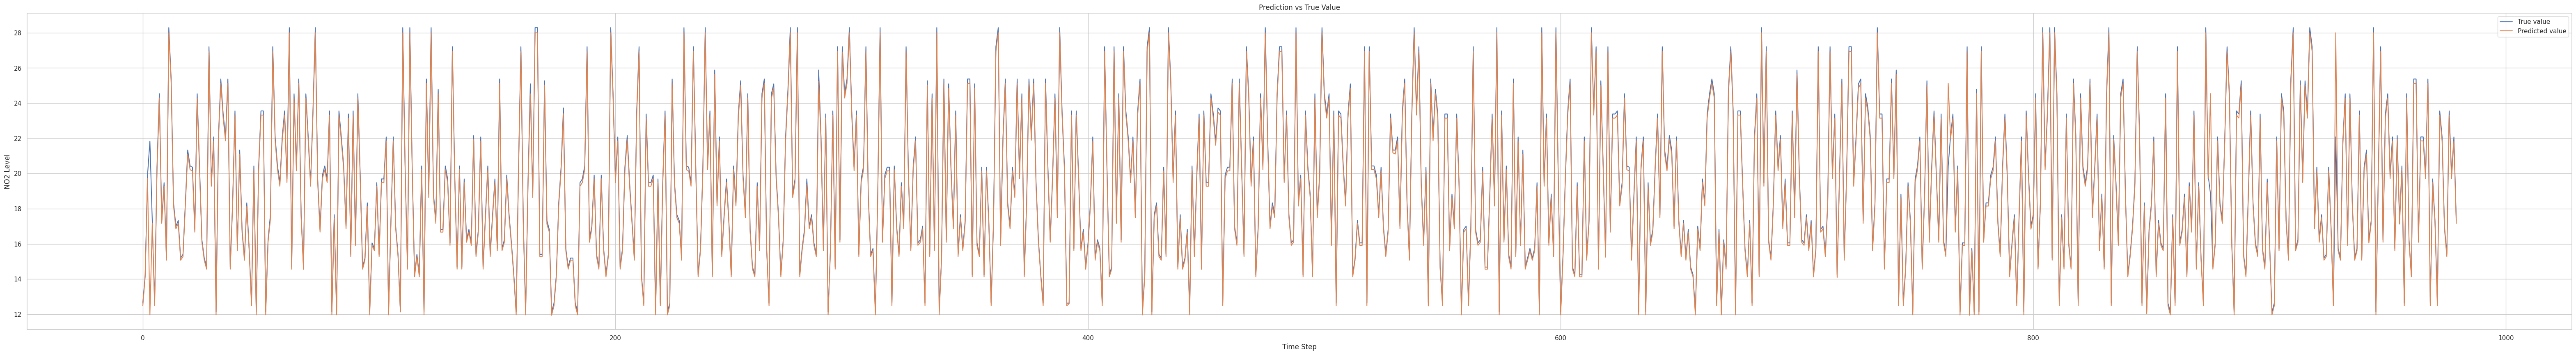

In [20]:
# Plotting baseline and predictions
plt.figure(figsize=(80, 10))
plt.plot(y_test_inv.flatten(), label='True value')
plt.plot(test_predict.flatten(), label='Predicted value')
plt.title('Prediction vs True Value')
plt.xlabel('Time Step')
plt.ylabel('NO2 Level')
plt.legend()
plt.show()

In [21]:
# Load the dataset
file_path = 'Filtered_Nitrogen_Dioxide_Data.csv'
data = pd.read_csv(file_path)
# Convert 'Start_Date' to datetime
data['Start_Date'] = pd.to_datetime(data['Start_Date'], infer_datetime_format=True)

# Encode 'Geo Place Name' using label encoding
le = LabelEncoder()
data['Geo Place Encoded'] = le.fit_transform(data['Geo Place Name'])

# Extract year, month, and day from 'Start_Date'
data['Year'] = data['Start_Date'].dt.year
data['Month'] = data['Start_Date'].dt.month
data['Day'] = data['Start_Date'].dt.day

# Additional feature: day of week as a potential predictor
data['DayOfWeek'] = data['Start_Date'].dt.dayofweek

# Prepare features and target variable
X = data[['Geo Place Encoded', 'Year', 'Month', 'Day', 'DayOfWeek']]
y = data['Data Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that includes scaling and the regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(random_state=42))
])

# Parameters for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Best Model Mean Squared Error:", mse)
print("R2 Score:", r2)


Best Model Mean Squared Error: 3.4187790741095196
R2 Score: 0.9155426262777883


In [36]:
# Hybrid Model for Forecasting NO2 Levels

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Ensure data is loaded and preprocessed appropriately
# Note: This code assumes that the data is already preprocessed as needed for each model.

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Model Preparation
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=50, verbose=0)
lstm_pred = lstm_model.predict(X_test_lstm)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# RandomForest Model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Combine predictions
final_pred = (lstm_pred.ravel() + xgb_pred + rf_pred) / 3

# Calculate RMSE for each model
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
hybrid_rmse = np.sqrt(mean_squared_error(y_test, final_pred))

# Print RMSE results
print(f'LSTM RMSE: {lstm_rmse}')
print(f'XGBoost RMSE: {xgb_rmse}')
print(f'RandomForest RMSE: {rf_rmse}')
print(f'Hybrid Model RMSE: {hybrid_rmse}')


38/38 [==============================] - 0s 2ms/step
LSTM RMSE: 5.385285441909531
XGBoost RMSE: 2.0032620845905944
RandomForest RMSE: 2.3680846116102097
Hybrid Model RMSE: 2.7570528442071582


In [38]:
# Stacking for Hybrid Model Improvement

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming lstm_pred, xgb_pred, rf_pred are arrays containing the predictions from each respective model

# Prepare the new feature matrix for the meta-model, consisting of predictions from the LSTM, XGBoost, and RandomForest models
stacked_features = np.column_stack((lstm_pred.ravel(), xgb_pred, rf_pred))

# Split the stacked features for training the meta-model
# Using the same test set as for other models for consistency
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(stacked_features, y_test, test_size=0.2, random_state=42)

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(X_train_meta, y_train_meta)

# Make final predictions using the meta-model
final_pred_meta = meta_model.predict(X_test_meta)

# Evaluate the meta-model
meta_rmse = np.sqrt(mean_squared_error(y_test_meta, final_pred_meta))
print(f'Meta-Model RMSE: {meta_rmse}')


Meta-Model RMSE: 1.8980222657290065


In [43]:
def predict_no2_level_stacked(date, geo_place_name):
    # Convert the date to datetime and extract features
    date = pd.to_datetime(date)
    year = date.year
    month = date.month
    day = date.day
    day_of_week = date.dayofweek

    # Encode the geographic place name using a pre-fitted LabelEncoder
    geo_place_encoded = le.transform([geo_place_name])[0]

    # Prepare the features array
    features = np.array([[geo_place_encoded, year, month, day, day_of_week]])

    # Generate predictions from the base models
    lstm_pred = lstm_model.predict(features.reshape((1, 1, features.shape[1]))).ravel()
    xgb_pred = xgb_model.predict(features)
    rf_pred = rf_model.predict(features)

    # Stack the predictions to form a new feature set for the meta-model
    stacked_features = np.column_stack((lstm_pred, xgb_pred, rf_pred))

    # Use the meta-model to make the final prediction
    predicted_value = meta_model.predict(stacked_features)[0]

    return predicted_value

# Example usage
example_date = '2024-08-01'
example_place = 'Manhattan'
predicted_level = predict_no2_level_stacked(example_date, example_place)
print(f"Predicted NO2 Level on {example_date} at {example_place}: {predicted_level}")


1/1 [==============================] - 0s 27ms/step
Predicted NO2 Level on 2024-08-01 at Manhattan: 15.692175057036017


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Data setup (assuming predictions and actual values are in place)
models = {
    'LSTM': lstm_pred.ravel(),
    'XGBoost': xgb_pred,
    'RandomForest': rf_pred,
    'Meta-Model': final_pred_meta
}
actual = y_test_meta

# Interactive Overlay Plot using Plotly
fig = go.Figure()
for model_name, predictions in models.items():
    fig.add_trace(go.Scatter(x=list(range(len(actual))), y=actual, mode='lines', name='Actual'))
    fig.add_trace(go.Scatter(x=list(range(len(predictions))), y=predictions, mode='lines', name=model_name))
fig.update_layout(title='Interactive Prediction Comparison', xaxis_title='Sample Index', yaxis_title='NO2 Level')
fig.show()


In [61]:
import pandas as pd
from ipywidgets import interact, widgets
from datetime import datetime

# Assuming you have a list of places for the dropdown
places = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

def predict_no2_level_stacked(date_str, geo_place_name):
    # Convert the date string to datetime
    date = pd.to_datetime(date_str)
    year = date.year
    month = date.month
    day = date.day
    day_of_week = date.dayofweek

    # Encode the geographic place name using a pre-fitted LabelEncoder
    geo_place_encoded = le.transform([geo_place_name])[0]

    # Prepare the features array
    features = np.array([[geo_place_encoded, year, month, day, day_of_week]])

    # Generate predictions from the base models
    lstm_pred = lstm_model.predict(features.reshape((1, 1, features.shape[1]))).ravel()
    xgb_pred = xgb_model.predict(features)
    rf_pred = rf_model.predict(features)

    # Stack the predictions to form a new feature set for the meta-model
    stacked_features = np.column_stack((lstm_pred, xgb_pred, rf_pred))

    # Use the meta-model to make the final prediction
    predicted_value = meta_model.predict(stacked_features)[0]

    return predicted_value

# Define the interactive widget for user input
date_picker = widgets.DatePicker(description='Select Date')
place_dropdown = widgets.Dropdown(options=places, description='Select Place')

# Define the function to handle widget interactions
def handle_interaction(date, place):
    date_str = datetime.strftime(date, '%Y-%m-%d')
    predicted_level = predict_no2_level_stacked(date_str, place)
    print(f"Predicted NO2 Level on {date_str} at {place}: {predicted_level}")

# Display the interactive widget
interact(handle_interaction, date=date_picker, place=place_dropdown);


interactive(children=(DatePicker(value=None, description='Select Date'), Dropdown(description='Select Place', …